This algorithm analyses data from an antibody binding experiment.

The input is a csv with three columns: index, optical_density, and `amino_acid_sequence'.

The output is:

a histogram of optical densities as a PNG file
a csv with the following statistics: min, max and mean optical density for amino acid groups to an accuracy of 1 decimal place.

Enter the path to the input CSV file: /content/sample_data/input_data.csv
Enter the full path to the output CSV file for statistics: /content/sample_data/output_data.csv
Enter the full path to the output PNG file for the histogram: /content/sample_data/output_data.png
Do you want to see the results on the screen? (yes/no): yes


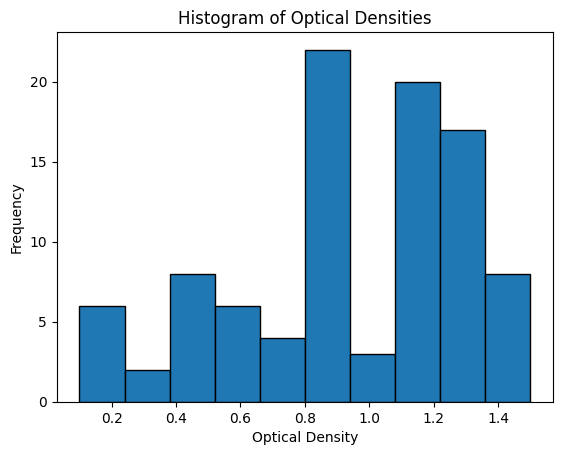


Statistics:
                     min  max  mean
amino_acid_sequence                
GFAFSSYD             0.9  1.2   1.0
GFAFSSYW             0.8  0.8   0.8
GFPFEMYD             0.9  0.9   0.9
GFSFSSYD             0.7  0.7   0.7
GFTFDDSV             0.4  0.4   0.4
GFTFDDYA             0.3  1.5   1.0
GFTFDDYE             0.8  0.8   0.8
GFTFDDYG             0.9  0.9   0.9
GFTFDTYD             1.3  1.3   1.3
GFTFEEHF             1.2  1.2   1.2
GFTFGSYD             0.1  0.1   0.1
GFTFRNYA             1.2  1.4   1.3
GFTFSDYP             0.8  1.3   1.1
GFTFSNYA             0.4  1.3   0.8
GFTFSNYG             1.4  1.4   1.4
GFTFSSTA             1.0  1.0   1.0
GFTFSSYA             0.9  1.3   1.1
GFTFSSYD             1.0  1.0   1.0
GFTFSSYF             0.8  1.3   1.0
GFTFSSYG             1.2  1.4   1.3
GFTFSSYW             0.1  1.5   1.0
GFTFSSYY             0.5  0.5   0.5
GFTFYDYH             0.9  1.1   1.0
GFTLSSYW             0.1  1.3   0.5
GFTVSGYA             0.3  0.3   0.3
GFXFVRYD       

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

class AntibodyAnalyzer:
    def __init__(self, input_file, output_csv, output_png, show_results=True):
        self.input_file = input_file
        self.output_csv = output_csv
        self.output_png = output_png
        self.show_results = show_results

    def get_valid_filepath(self, file_type):
        while True:
            file_path = input(f"Enter the path to the {file_type} file: ")

            # Check if the directory of the file path is valid
            directory = os.path.dirname(file_path)
            if os.path.isdir(directory):
                return file_path
            else:
                print(f"Invalid {file_type} file path. Please enter a valid path.")

    def analyze_data(self):
        try:
            # Read CSV file into a pandas DataFrame
            df = pd.read_csv(self.input_file)

            # Create a histogram of optical densities
            plt.hist(df['optical_density'], bins=10, edgecolor='black')
            plt.title('Histogram of Optical Densities')
            plt.xlabel('Optical Density')
            plt.ylabel('Frequency')
            if self.show_results:
                plt.show()
            plt.close()

            # Calculate statistics for amino acid groups
            amino_acid_groups = df.groupby('amino_acid_sequence')['optical_density']

            # Create a DataFrame with statistics
            stats_df = amino_acid_groups.agg(['min', 'max', 'mean']).round(1)

            # Print statistics to the screen with space if requested
            if self.show_results:
                print("\nStatistics:")
                print(stats_df)
                print("\n" * 2)  # Add two empty lines

            # Save the statistics to a CSV file with full path
            stats_df.to_csv(self.output_csv, index=True)
            print(f"Statistics saved to: {self.output_csv}")

            # Display a message about saving the histogram plot
            print(f"Histogram plot saved to: {self.output_png}")

        except Exception as e:
            print(f"Error occurred: {str(e)}")

if __name__ == "__main__":
    # Get input from the user
    input_file = input("Enter the path to the input CSV file: ")
    output_csv = input("Enter the full path to the output CSV file for statistics: ")
    output_png = input("Enter the full path to the output PNG file for the histogram: ")

    # Ask the user if they want to see the results on the screen
    show_results = input("Do you want to see the results on the screen? (yes/no): ").lower() == 'yes'

    # Create an instance of the AntibodyAnalyzer class
    analyzer = AntibodyAnalyzer(input_file, output_csv, output_png, show_results)

    # Call the analyze_data method
    analyzer.analyze_data()